In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('KAG_energydata_complete.csv')

In [3]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


<h3> Description of Columns</h3>

As the description for our data is not very much clear so, I have summarised the explanation of columns here as per my understanding.

- <b>date:</b> year-month-day hour:minute:second 
- <b>Appliances:</b> energy use in Wh 
- <b>lights:</b> energy use of light fixtures in the house in Wh 
- <b>T1:</b> Temperature in kitchen area, in Celsius 
- <b>RH_1:</b> Humidity in kitchen area, in % 
- <b>T2:</b> Temperature in living room area, in Celsius 
- <b>RH_2:</b> Humidity in living room area, in % 
- <b>T3:</b> Temperature in laundry room area 
- <b>RH_3:</b> Humidity in laundry room area, in % 
- <b>T4:</b> Temperature in office room, in Celsius 
- <b>RH_4:</b> Humidity in office room, in % 
- <b>T5:</b> Temperature in bathroom, in Celsius 
- <b>RH_5:</b> Humidity in bathroom, in % 
- <b>T6:</b> Temperature outside the building (north side), in Celsius 
- <b>RH_6:</b> Humidity outside the building (north side), in % 
- <b>T7:</b> Temperature in ironing room , in Celsius 
- <b>RH_7:</b> Humidity in ironing room, in % 
- <b>T8:</b> Temperature in teenager room 2, in Celsius 
- <b>RH_8:</b> Humidity in teenager room 2, in % 
- <b>T9:</b> Temperature in parents room, in Celsius 
- <b>RH_9:</b> Humidity in parents room, in % 
- <b>T_out:</b> Temperature outside (from Chievres weather station), in Celsius 
- <b>press_mm_hg:</b> Pressure (from Chievres weather station), in mm Hg 
- <b>RH_out:</b> Humidity outside (from Chievres weather station), in % 
- <b>Wind speed:</b> (from Chievres weather station), in m/s 
- <b>Visibility:</b> (from Chievres weather station), in km 
- <b>Tdewpoint:</b> (from Chievres weather station), dew in °C 
- <b>rv1:</b> Random variable 1, nondimensional 
- <b>rv2:</b> Random variable 2, nondimensional



# Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [5]:
print('The number of rows in dataset is - ' , data.shape[0])
print('The number of columns in dataset is - ' , data.shape[1])

The number of rows in dataset is -  19735
The number of columns in dataset is -  29


In [6]:
data.isnull().sum().sort_values(ascending = True)

date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

As we can see there are no null values in the data.

In [7]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [8]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.25,random_state=40)

In [9]:
print('Shape of Train Set - ' , train.shape)
print('Shape of Test Set - ' , test.shape)

Shape of Train Set -  (14801, 29)
Shape of Test Set -  (4934, 29)


In [10]:
# Dividing the columns based on type for clear column management 

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [11]:
# Seperate dependent and independent variables 
feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms ]
target_vars = train[col_target]

#### Description of Temperature

In [12]:
train[col_temp].describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,21.685153,20.343487,22.268005,20.857724,19.589105,7.923834,20.264300,22.028348,19.484679
std,1.605537,2.199037,1.999986,2.040012,1.842916,6.083047,2.105079,1.951399,2.010610
min,16.790000,16.100000,17.200000,15.100000,15.335000,-6.065000,15.390000,16.306667,14.890000
25%,20.745000,18.790000,20.790000,19.533333,18.290000,3.663333,18.700000,20.790000,18.000000
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.028571,22.111111,19.390000
75%,22.600000,21.533333,23.290000,22.100000,20.633333,11.293333,21.600000,23.390000,20.600000
max,26.260000,29.856667,29.200000,26.200000,25.745000,28.290000,25.963333,27.230000,24.500000


#### Description of Humidity 

In [13]:
train[col_hum].describe()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,40.271333,40.432370,39.252994,39.041339,50.939261,54.596942,35.401239,42.944133,41.567732
std,3.983201,4.081775,3.263513,4.355528,8.964531,31.163493,5.134281,5.240388,4.167305
min,27.233333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667
25%,37.363333,37.900000,36.900000,35.530000,45.400000,30.023333,31.500000,39.069091,38.500000
50%,39.656667,40.500000,38.560000,38.400000,49.090000,55.290000,34.900000,42.397143,40.900000
75%,43.090000,43.290000,41.790000,42.193333,53.694286,83.126667,39.000000,46.560000,44.363333
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667


#### Description of Light, weather and ramdom variables

In [14]:
train[col_weather + col_light + col_randoms ].describe()

,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,7.422035,3.768053,79.744066,755.561311,4.057009,38.345054,3.809202,25.014452,25.014452
std,5.304241,4.189370,14.952250,7.398129,2.449080,11.785900,7.940816,14.539819,14.539819
min,-5.000000,-6.600000,24.500000,729.366667,0.000000,1.000000,0.000000,0.006033,0.006033
25%,3.700000,0.933333,70.000000,750.983333,2.000000,29.000000,0.000000,12.469764,12.469764
50%,6.933333,3.450000,83.833333,756.100000,3.666667,40.000000,0.000000,24.936900,24.936900
75%,10.433333,6.566667,91.666667,760.966667,5.500000,40.000000,0.000000,37.736202,37.736202
max,26.033333,15.500000,100.000000,772.300000,14.000000,66.000000,60.000000,49.993173,49.993173


We can see that light columns has large amount of value as zero, still to confirm we will see the distribution of values.

In [15]:
# Check the distribution of values in lights column
feature_vars.lights.value_counts()

0     11438
10     1649
20     1230
30      414
40       64
50        5
60        1
Name: lights, dtype: int64

#### Description of Appliances 

In [16]:
target_vars.describe()

,Appliances
count,14801.000000
mean,97.835281
std,102.928289
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000



<h3>Observations</h3>

1) Temperature columns-Temperature inside the house varies between 14.89 Deg & 29.85 Deg ,temperatire outside(T6)aries between -6.06 Degcto 28.29 Deg.

2) Humidiy columns - Humidity inside house varies is between 20.60% to 63.36% with exception of RH_5 (Bathroom) and RH_6 (Outside house) which varies between 29.82% to 96.32% and 1% to 99.9% respectively.

3) Appliances - 75% of Appliance consumption is less than 100 Wh . With the maximum consumption of 1080 Wh , there will be outliers in this column and there are small number of cases where consumption is very high

4) Lights column - Intially I believed lights column will be able to give useful information . With 11438 0 (zero) enteries in 14801 rows , this column will not add any value to the model.Hence for now , I will be dropping this column



In [17]:
# Due to lot of zero enteries this column is of not much use and will be ignored in rest of the model
_ = feature_vars.drop(['lights'], axis=1 , inplace= True) ;

In [18]:
feature_vars.tail()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
11532,21.760,20.000000,22.00,20.60,20.100000,8.226667,20.200000,24.463333,20.00,41.933333,...,39.693333,38.863333,8.100000,5.200000,82.000000,754.800000,2.0,40.000000,36.275509,36.275509
16065,21.200,18.000000,22.10,20.26,19.600000,1.730000,19.290000,22.290000,19.60,36.433333,...,41.566667,39.480000,1.750000,0.650000,92.500000,764.700000,1.0,27.500000,37.879262,37.879262
14501,21.600,22.200000,22.70,22.39,20.000000,13.066667,21.290000,21.500000,20.29,37.466667,...,39.200000,37.900000,9.966667,4.100000,67.500000,762.616667,4.0,27.166667,22.496162,22.496162
14555,23.175,22.856667,23.29,22.89,21.166667,18.600000,22.238571,22.823333,20.20,37.722500,...,38.433333,36.363333,17.366667,5.916667,47.500000,759.633333,4.0,38.166667,32.362623,32.362623
11590,21.600,18.700000,22.50,20.00,19.700000,3.030000,20.200000,23.390000,20.20,38.700000,...,45.526667,43.090000,3.566667,2.566667,93.666667,758.500000,2.0,48.000000,24.429539,24.429539


## Data Visualisation 

In [19]:
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= data.date  ,  mode = "lines", y = data.Appliances )
layout = go.Layout(title = 'Appliance energy consumption pattern' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [20]:
# Adding column to mark weekdays (0) and weekends(1) for time series evaluation , 

data['WEEKDAY'] = ((pd.to_datetime(data['date']).dt.dayofweek)// 5 == 1).astype(float)
# There are 5472 weekend recordings 
data['WEEKDAY'].value_counts()

0.0    14263
1.0     5472
Name: WEEKDAY, dtype: int64

In [21]:
# Find rows with weekday 
temp_weekday =  data[data['WEEKDAY'] == 0]
# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= temp_weekday.date  ,  mode = "lines", y = temp_weekday.Appliances )
layout = go.Layout(title = 'Appliance energy consumption pattern on weekdays' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [22]:
# Find rows with weekend 

temp_weekend =  data[data['WEEKDAY'] == 1]

# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= temp_weekend.date  ,  mode = "lines", y = temp_weekend.Appliances )
layout = go.Layout(title = 'Appliance energy consumption pattern on weekend' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

####  Histogram of all the features to understand the distribution

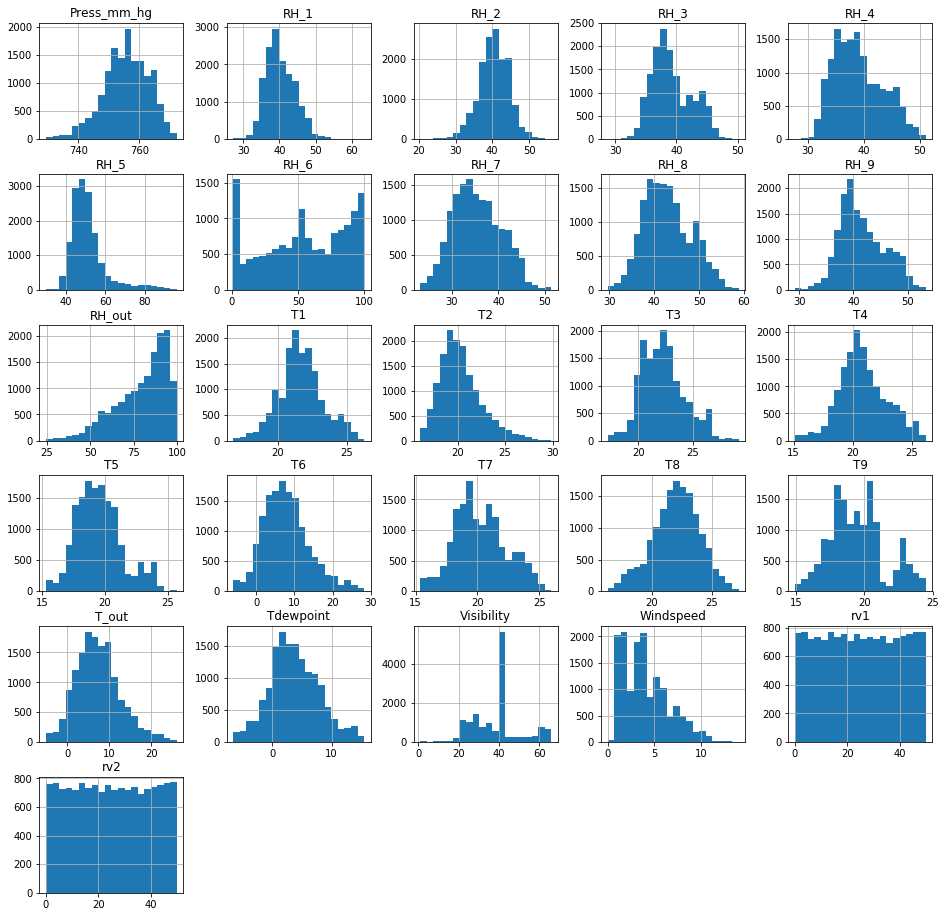

In [25]:
feature_vars.hist(bins = 20 , figsize= (16,16)) ;

<h4>From this we can see that there are four features which has unequal distribution which are as following</h4>

   - T9
   - RH_6
   - RH_out
   - Visibility
   - Windspeed
<h4> So I am ploting this four plots to understand it</h4>

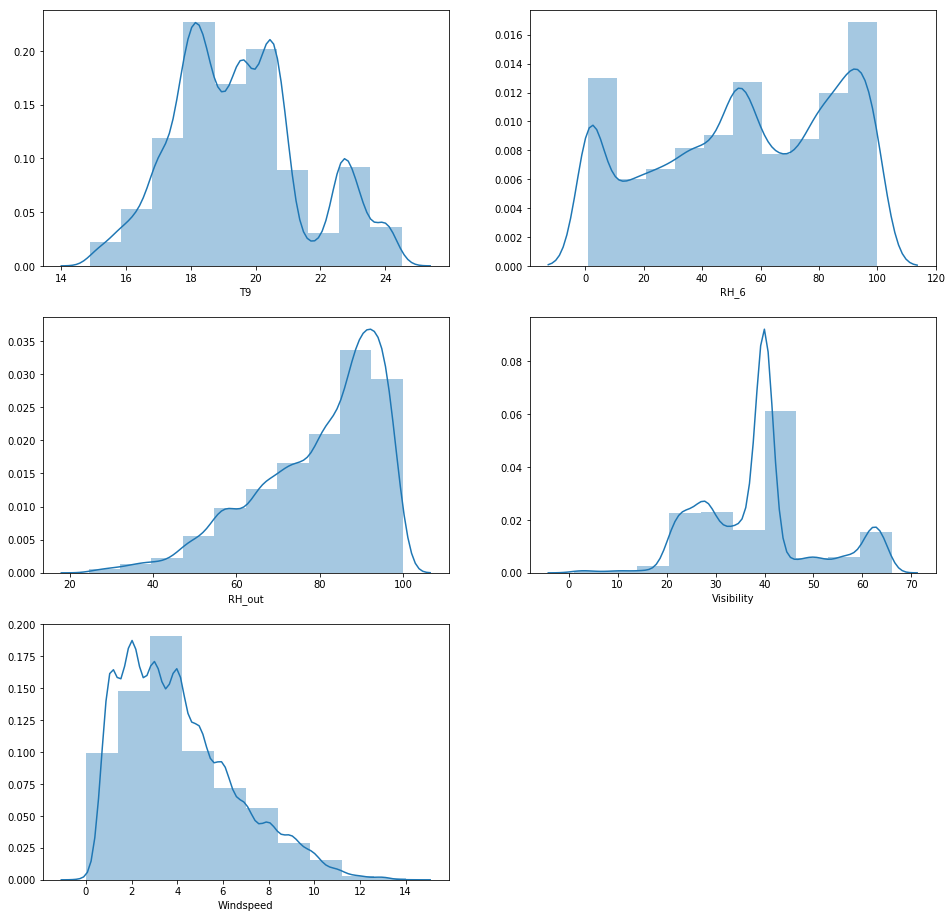

In [35]:
f, ax = plt.subplots(3,2,figsize=(16,16))
vis0 = sns.distplot(feature_vars["T9"],bins=10, ax= ax[0][0])
vis1 = sns.distplot(feature_vars["RH_6"],bins=10, ax= ax[0][1])
vis2 = sns.distplot(feature_vars["RH_out"],bins=10, ax=ax[1][0])
vis3 = sns.distplot(feature_vars["Visibility"],bins=10, ax=ax[1][1])
vis4 = sns.distplot(feature_vars["Windspeed"],bins=10, ax=ax[2][0])
#ax.flat[-1].set_visible(False) # to remove last plot extra plot
f.delaxes(ax[2][1])# to remove last plot extra plot

#### Distribution of values in Applainces column

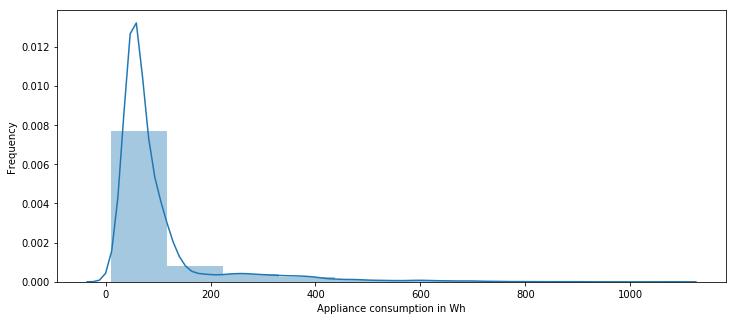

In [26]:
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target_vars , bins=10 ) ;


<h3>Observations</h3>

1) Temperature - All the columns follow normal distribution except T9

2) Humidity - All columns follow normal distribution except RH_6 and RH_out ,as per my understanding it is because these sensors are outside the house 

3) Appliance - This column is postively skewed , most the values are around mean 100 Wh . So I think that there are outliers in this column 

4) Visibilty - This column is negatively skewed

5) Windspeed - This column is postively skewed


